In [132]:
# loading virtual python environment (created in EC2 terminal)
!source ./bin/activate

6802.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [133]:
# import python libraries
import pandas as pd
from sklearn.impute import SimpleImputer # fixing missing values 
import numpy as np
from sklearn.preprocessing import LabelEncoder # label encoding for 2 values in a single column
from sklearn.compose import ColumnTransformer # trensform to categorical values
from sklearn.preprocessing import OneHotEncoder # trensform to categorical values
from sklearn.model_selection import train_test_split # test and training split
from sklearn.tree import DecisionTreeClassifier # calling Decision Tree Classifier
from sklearn.metrics import accuracy_score, confusion_matrix # evaluation
import matplotlib.pyplot as plt # for plotting tree
from sklearn.tree import plot_tree # for plotting tree

In [52]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [134]:
# read in data from github raw
in_df = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv")

In [135]:
# print data
print(in_df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [ ]:
# read from local folder (after import to workshpace using up arrow button over workspace name)
#df1 = pd.read_csv('data_preprocess1.csv')

In [ ]:
#print(df1)

In [54]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [55]:
# print top 5 rows
in_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [56]:
# bottom 5 rows 
in_df.tail()

,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [57]:
# access particular column 
in_df['Age']

0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [58]:
# access multiple columns
in_df[['Age','Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [59]:
# using data from Iloc
in_df.iloc[:0]

,Country,Age,Salary,Purchased


In [60]:
in_df.iloc[:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [61]:
in_df.iloc[1:,0:2]

,Country,Age
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0
10,Germany,28.0


In [136]:
# separating data into input and output
# .values makes in an npy array
input_features = in_df.iloc[:,0:3].values
label = in_df.iloc[:,-1].values

In [63]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 nan]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [64]:
print(label)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'No']


In [137]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean') # create method to fill in missing vlaues with the column mean

In [138]:
impute.fit(input_features[:,1:3]) # calculating the missing values
input_features[:,1:3] = impute.transform(input_features[:,1:3]) # making changes

In [139]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [68]:
# so finally features and label
input_features
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [140]:
# converting 2 string values of yes and no into 0 and 1
le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [141]:
# data preprocessing using categorical values (bc there are 3 countries) (function to call)
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder = 'passthrough')

In [142]:
input_features = np.array(ct.fit_transform(input_features)) # turns col 1 into 3 cols with 0 or 1 for each if true/false
print(input_features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [143]:
# finally we have input and label that we can use to train a ML algorithm
input_features

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 39.0, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 28.0, 49000.0],
       [1.0, 0.0, 0.0, 42.0, 75000.0],
       [0.0, 0.0, 1.0, 33.0, 56000.0],
       [0.0, 1.0, 0.0, 45.0, 77000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0],
       [0.0, 0.0, 1.0, 51.0, 85000.0],
       [0.0, 1.0, 0.0, 36.0, 66071.42857142857],
       [1.0, 0.0, 0.0, 31.0, 55000.0],
       [0.0, 0.0, 1.0, 39.0, 63000.0],
       [0.0, 1.0, 0.0, 47.0, 80000.0],
       [1.0, 0.0, 0.0, 26.0, 47000.0],
       [0.0, 0.0, 1.0, 32.0, 53000.0],
       [0.0, 1.0, 0.0, 41.0, 71000.0],
       [1.0, 0.0, 0.0, 49.0, 82000.0],
       [0.0, 0.0, 1.0, 34.0, 57000.0],
     

In [144]:
label

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [145]:
training_input, testing_input, training_label, testing_label = train_test_split(input_features, label, test_size = 0.1) # test_size ranges from 0-1. 0.1 means 10% goes to testing dataset


In [146]:
training_input

array([[0.0, 0.0, 1.0, 39.0, 63000.0],
       [0.0, 0.0, 1.0, 33.0, 56000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 46.0, 78000.0],
       [0.0, 0.0, 1.0, 39.0, 52000.0],
       [1.0, 0.0, 0.0, 31.0, 55000.0],
       [0.0, 1.0, 0.0, 45.0, 77000.0],
       [1.0, 0.0, 0.0, 53.0, 90000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 66071.42857142857],
       [0.0, 0.0, 1.0, 34.0, 57000.0],
       [1.0, 0.0, 0.0, 42.0, 75000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 1.0, 51.0, 85000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 41.0, 71000.0],
       [0.0, 1.0, 0.0, 47.0, 80000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 26.0, 47000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0],
       [1.0, 0.0, 0.0, 52.0, 88000.0],
       [0.0, 1.0, 0.0, 36.0, 66071.42857142857],
     

In [107]:
testing_input

array([[1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 1.0, 39.0, 63000.0],
       [1.0, 0.0, 0.0, 29.0, 51000.0]], dtype=object)

In [108]:
testing_label

array([1, 1, 1])

In [147]:
# calling DecisionTree Classifier
classifier = DecisionTreeClassifier()

In [148]:
# Training classifier with above preprocessed split data
trained_model = classifier.fit(training_input, training_label)

In [149]:
# test the model (make some predictions)
predicted_values = trained_model.predict(testing_input)

In [150]:
print(testing_label) # compare predicitons to reserved teting labels)

[1 0 0]


In [151]:
print(predicted_values)

[0 0 0]


In [152]:
# to check model evaluation accuracy for large datasets where you can't just compare visually
# using accuracy score 
accuracy_score(testing_label, predicted_values)
# outcome will be from 0 to 1
# o.66 means 66% accuracy score

0.6666666666666666

In [115]:
# testing by input new random data -- you can try
new_data = np.array([['Spain', '39', '51000']])

In [116]:
# need to do imputing 
#new_data = np.array(ct.fit_transform(new_data)) # turns col 1 into 3 cols with 0 or 1 for each if true/false
#print(new_data)

[['1.0' '39' '51000']]


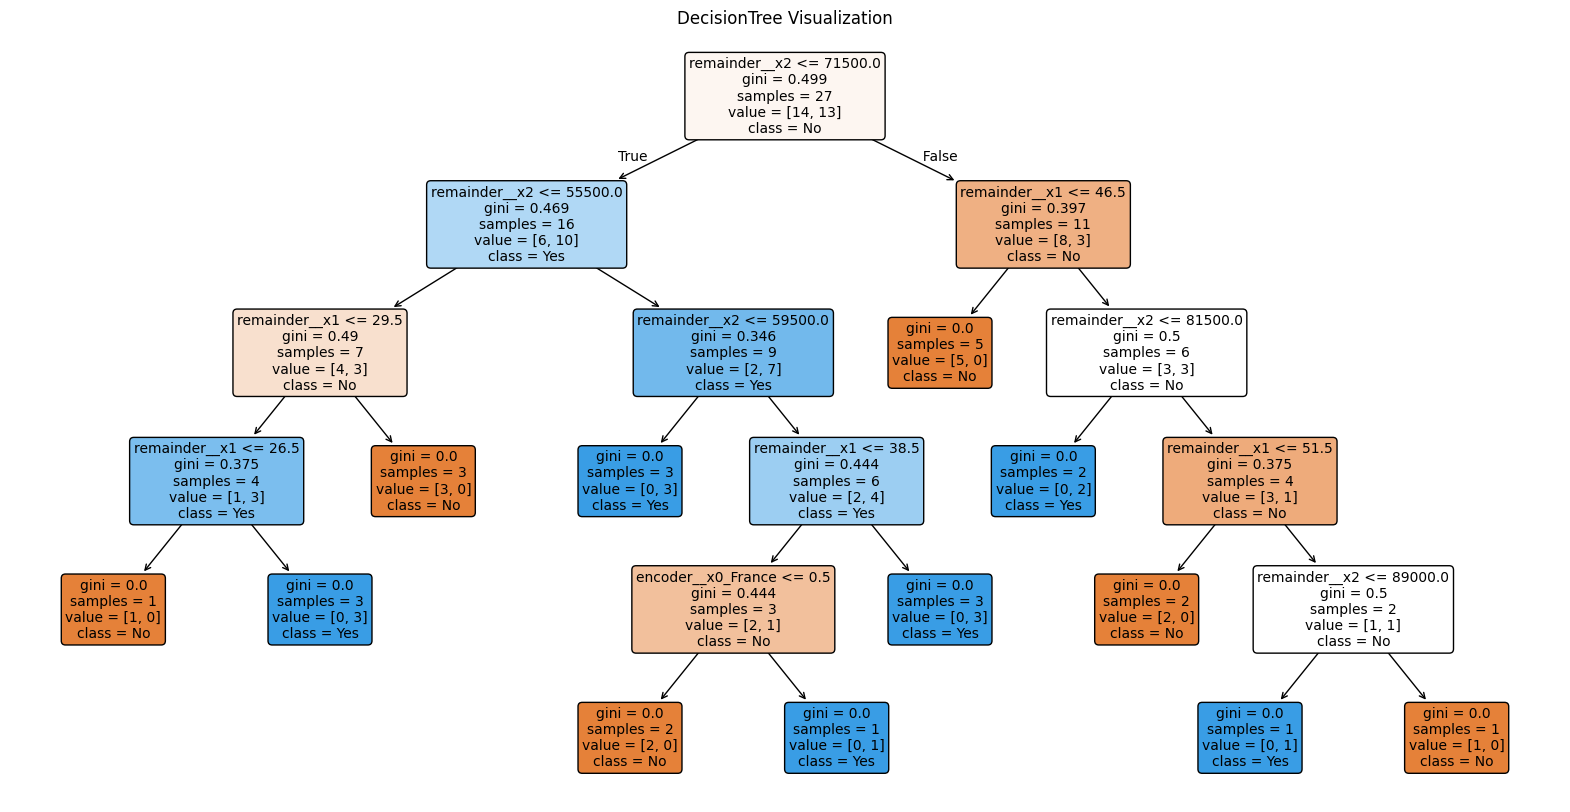

In [153]:
# we can use python to check decision tree graph
# we can use python to check Decision Tree Graphx

plt.figure(figsize=(20,10))
plot_tree(classifier,
         feature_names=ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)

plt.title("DecisionTree Visualization")
plt.show()
 

In [154]:
# features and labels
# printing names
le.classes_

array(['No', 'Yes'], dtype=object)

In [156]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)